# Imports

In [1]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt

# Create environment

In [2]:
env = gym.make("MountainCar-v0")
print(env.observation_space)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Box(2,)


# Hyperparameters

In [3]:
# Create a Q-table to store the rewards
Q_table = np.zeros((20, 20, 3)) # Initialize the q-table
alpha = 0.3 # Initialize alpha value to 0.3
buckets = [20, 20]  # Array to store actions
gamma = 0.99    # Discount value
rewards = [] # Array to store rewards

# Training and updating the Q-values

In [4]:
def toDiscreteStates(observation):
    interval = [0 for i in range(len(observation))]
    max_range = [1.2, 0.07]  

    for i in range(len(observation)):
        data = observation[i]
        inter = int(math.floor((data + max_range[i]) / (2 * max_range[i] / buckets[i])))
        if inter >= buckets[i]:
            interval[i] = buckets[i] - 1
        elif inter < 0:
            interval[i] = 0
        else:
            interval[i] = inter
    return interval

def get_action(observation, t):
    # Calculate the action for every episode
    if np.random.random() < max(0.001, min(0.015, 1.0 - math.log10((t + 1) / 220.))):  
        return env.action_space.sample()
    interval = toDiscreteStates(observation)
    return np.argmax(np.array(Q_table[tuple(interval)]))

def updateQ(observation, reward, action, ini_obs, t):
    # Update the observation, action and reward for every top performed episode
    interval = toDiscreteStates(observation)

    Q_next = max(Q_table[tuple(interval)])

    ini_interval = toDiscreteStates(ini_obs)

    Q_table[tuple(ini_interval)][action] += max(0.4, min(0.1, 1.0 - math.log10((t + 1) / 125.))) * (
                reward + gamma * (Q_next) - Q_table[tuple(ini_interval)][action])

# Train the agent

In [5]:
# For every episode, calculate the action and reward 
for i_episode in range(1000):
    observation = env.reset()
    t = 0
    while (True):
        action = get_action(observation, i_episode)
        observation1, reward, done, info = env.step(action)
        next_action = get_action(observation1,i_episode)
        updateQ(observation1, reward, action, observation, t)
        observation = observation1
        action = next_action
        t += 1
        if done:
            print("Episode solved in {:d} episodes".format(t))
            rewards.append(t + 1)
            break



Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode 

Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode 

Episode solved in 198 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 197 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 170 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 177 episodes
Episode solved in 172 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode 

Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 189 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 193 episodes
Episode solved in 200 episodes
Episode solved in 163 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode solved in 200 episodes
Episode 

# Plot the graph of rewards

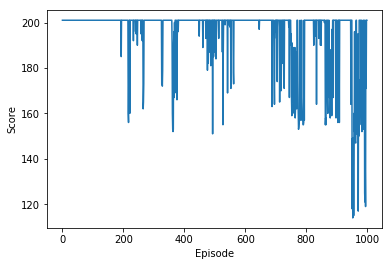

In [6]:
plt.plot(rewards)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()
env.close()